# Final Project: Night at a Museum (in Paris)

In [1]:
#List of libraries used in the project:
import pandas as pd

!pip install geocoder
import geocoder

import json
import requests
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import folium

import numpy as np

from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported!')

Solving environment: done

# All requested packages already installed.

Libraries imported!


### Let us import the data about arrondissments of Paris from Wikipedia page

In [2]:
url = 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris'

In [3]:
df = pd.read_html(url)

In [4]:
df = df[2]

In [5]:
df.columns

Index(['Arrondissement (R for Right Bank, L for Left Bank)', 'Name',
       'Area (km2)', 'Population(2017 estimate)',
       'Density (2017)(inhabitants per km2)', 'Peak of population', 'Mayor',
       '2020-2026'],
      dtype='object')

In [6]:
df.rename(columns={'Arrondissement (R for Right Bank, L for Left Bank)':'Arrondissement'}, inplace=True)
df.head()

,Arrondissement,Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor,2020-2026
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS),NaN
1,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD),NaN
2,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR),NaN
3,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR),NaN
4,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR),NaN


In [7]:
lat = []
lng = []
coordinates = None

arrondissements = df['Name']

for a in arrondissements:
    g = geocoder.arcgis('{}, Paris, France'.format(a))
    coordinates = g.latlng
    lat.append(coordinates[0])
    lng.append(coordinates[1])
    print(a)

Louvre, Bourse, Temple, Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


In [8]:
df['Latitude'] = lat
df['Longitude'] = lng

In [9]:
df

,Arrondissement,Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor,2020-2026,Latitude,Longitude
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS),NaN,48.857101,2.353064
1,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD),NaN,48.846210,2.346110
2,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR),NaN,48.847580,2.340940
3,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR),NaN,48.860830,2.318590
4,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR),NaN,48.869317,2.316878
5,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),60071,27556,1901,Delphine Bürkli (DVD),NaN,48.882110,2.327990
6,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),90836,31431,1881,Alexandra Cordebard (PS),NaN,48.842150,2.375990
7,11th (XIe) R,Popincourt,3.666 km2 (1.415 sq mi),147470,40183,1911,François Vauglin (PS),NaN,48.859350,2.376010
8,12th (XIIe) R,Reuilly,16.324 km2 (6.303 sq mi)¹6.377 km2 (2.462 sq mi)²,141287,"8,657¹21,729²",1962,Emmanuelle Pierre-Marie (The Greens),NaN,48.845002,2.389365
9,13th (XIIIe) L,Gobelins,7.146 km2 (2.759 sq mi),183399,25650,20055,Jérôme Coumet (PS),NaN,48.834504,2.353472


### After noting that the 16th arrondissement is anomalous, I 'manually' changed it:

In [10]:
df.iloc[12, df.columns.get_loc('Latitude')] = 48.8637
df.iloc[12, df.columns.get_loc('Longitude')] = 2.2769

In [11]:
df

,Arrondissement,Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor,2020-2026,Latitude,Longitude
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS),NaN,48.857101,2.353064
1,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD),NaN,48.846210,2.346110
2,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR),NaN,48.847580,2.340940
3,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR),NaN,48.860830,2.318590
4,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR),NaN,48.869317,2.316878
5,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),60071,27556,1901,Delphine Bürkli (DVD),NaN,48.882110,2.327990
6,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),90836,31431,1881,Alexandra Cordebard (PS),NaN,48.842150,2.375990
7,11th (XIe) R,Popincourt,3.666 km2 (1.415 sq mi),147470,40183,1911,François Vauglin (PS),NaN,48.859350,2.376010
8,12th (XIIe) R,Reuilly,16.324 km2 (6.303 sq mi)¹6.377 km2 (2.462 sq mi)²,141287,"8,657¹21,729²",1962,Emmanuelle Pierre-Marie (The Greens),NaN,48.845002,2.389365
9,13th (XIIIe) L,Gobelins,7.146 km2 (2.759 sq mi),183399,25650,20055,Jérôme Coumet (PS),NaN,48.834504,2.353472


In [12]:
df.isnull()

,Arrondissement,Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor,2020-2026,Latitude,Longitude
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,True,False,False


In [13]:
df.drop(['2020-2026'], axis=1, inplace=True)
df.drop(['Area (km2)'], axis=1, inplace=True)
df.drop(['Population(2017 estimate)'], axis=1, inplace=True)
df.drop(['Density (2017)(inhabitants per km2)'], axis=1, inplace=True)
df.drop(['Peak of population'], axis=1, inplace=True)
df.drop(['Mayor'], axis=1, inplace=True)

In [14]:
df

,Arrondissement,Name,Latitude,Longitude
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",48.857101,2.353064
1,5th (Ve) L,Panthéon,48.846210,2.346110
2,6th (VIe) L,Luxembourg,48.847580,2.340940
3,7th (VIIe) L,Palais-Bourbon,48.860830,2.318590
4,8th (VIIIe) R,Élysée,48.869317,2.316878
5,9th (IXe) R,Opéra,48.882110,2.327990
6,10th (Xe) R,Entrepôt,48.842150,2.375990
7,11th (XIe) R,Popincourt,48.859350,2.376010
8,12th (XIIe) R,Reuilly,48.845002,2.389365
9,13th (XIIIe) L,Gobelins,48.834504,2.353472


In [15]:
df_paris = df

### Let us now set up Foursquare's credentials.

In [16]:
CLIENT_ID = 'GPAXIIUH2BT4LFICUWK2QHG2MVDRXVVPCKJZJ24EOWGNSDFB'
CLIENT_SECRET = 'F4QDIQXCZOYTTJ5W4I5FO04N0IEAMORNTAW05LPXYFC2QSXC'
VERSION = '20180605'
arrondissement_latitude = df.loc[0, 'Latitude']
arrondissement_longitude = df.loc[0, 'Longitude']
radius = 500
LIMIT = 200

In [17]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    arrondissement_latitude, 
    arrondissement_longitude, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=GPAXIIUH2BT4LFICUWK2QHG2MVDRXVVPCKJZJ24EOWGNSDFB&client_secret=F4QDIQXCZOYTTJ5W4I5FO04N0IEAMORNTAW05LPXYFC2QSXC&v=20180605&ll=48.85710105146564,2.353063763623588&radius=500&limit=200'

In [18]:
results = requests.get(url).json()

### We use the library Geocoder to get the map of Paris and its arrondissements.

In [19]:
address = 'Paris, France'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [20]:
paris_map = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Arrondissement']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=1.,
        parse_html=False).add_to(paris_map)  
    
paris_map

### Here we define a function that assigns a category type to a specific venue:

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Fleux',Furniture / Home Store,48.858763,2.354161
1,Place de l'Hôtel de Ville – Esplanade de la Li...,Plaza,48.856925,2.351412
2,Maison Aleph,Pastry Shop,48.857348,2.354873
3,Galerie Azzedine Alaïa,Art Gallery,48.857545,2.355217
4,Parc Rives de Seine,Park,48.855510,2.351419


In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Arrondissement', 
                  'Arrondissement Latitude', 
                  'Arrondissement Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
paris_venues = getNearbyVenues(names=df_paris['Arrondissement'], 
                                   latitudes=df_paris['Latitude'], 
                                   longitudes=df_paris['Longitude']
                                  )

Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe) / 4th (IVe) R
5th (Ve) L
6th (VIe) L
7th (VIIe) L
8th (VIIIe) R
9th (IXe) R
10th (Xe) R
11th (XIe) R
12th (XIIe) R
13th (XIIIe) L
14th (XIVe) L
15th (XVe) L
16th (XVIe) R
17th (XVIIe) R
18th (XVIIIe) R
19th (XIXe) R
20th (XXe) R


In [25]:
paris_venues.head()

,Arrondissement,Arrondissement Latitude,Arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,48.857101,2.353064,Fleux',48.858763,2.354161,Furniture / Home Store
1,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,48.857101,2.353064,Place de l'Hôtel de Ville – Esplanade de la Li...,48.856925,2.351412,Plaza
2,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,48.857101,2.353064,Maison Aleph,48.857348,2.354873,Pastry Shop
3,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,48.857101,2.353064,Galerie Azzedine Alaïa,48.857545,2.355217,Art Gallery
4,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,48.857101,2.353064,Parc Rives de Seine,48.855510,2.351419,Park


In [26]:
paris_venues.shape

(1134, 7)

In [27]:
paris_venues.groupby('Arrondissement').count()

,Arrondissement Latitude,Arrondissement Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Arrondissement,,,,,,
10th (Xe) R,54,54,54,54,54,54
11th (XIe) R,80,80,80,80,80,80
12th (XIIe) R,72,72,72,72,72,72
13th (XIIIe) L,95,95,95,95,95,95
14th (XIVe) L,62,62,62,62,62,62
15th (XVe) L,53,53,53,53,53,53
16th (XVIe) R,23,23,23,23,23,23
17th (XVIIe) R,95,95,95,95,95,95
18th (XVIIIe) R,100,100,100,100,100,100


In [28]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 180 uniques categories.


### Now let us use the One-Hot encoding in order to classify the data of venue categories.

In [29]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Arrondissement'] = paris_venues['Arrondissement'] 

fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Arrondissement,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,20th (XXe) R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,20th (XXe) R,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1131,20th (XXe) R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,20th (XXe) R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
paris_grouped = paris_onehot.groupby('Arrondissement').mean().reset_index()
pd.set_option('display.max_columns', None)
paris_grouped

,Arrondissement,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auvergne Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brasserie,Breakfast Spot,Brewery,Burger Joint,Burgundian Restaurant,Bus Stop,Café,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Planetarium,Platform,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Resort,Restaurant,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Soup Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,10th (Xe) R,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.0000,0.018519,0.037037,0.018519,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.00,0.000000,0.018519,0.00,0.018519,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.018519,0.055556,0.000000,0.0000,0.000000,0.000000,0.037037,0.000000,0.018519,0.000000,0.000000,0.018519,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.018519,0.00,0.000000,0.000000,0.000000,0.129630,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148148,0.018519,0.018519,0.000000,0.000000,0.00,0.037037,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.018519,0.000000,0.00,0.000000,0.018519,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.037037,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.018519,0.018519,0.000000,0.037037,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.092593,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000

In [31]:
art_cols = [col for col in paris_grouped.columns if ('Art' in col or 
                                                     'Gallery' in col or 
                                                     'Museum' in col or 
                                                     'Theater' in col or
                                                     'Cinema' in col or 
                                                     'Book' in col or
                                                     'Comedy' in col or 
                                                     'Comic' in col or
                                                     'Cultural' in col or 
                                                     'Histor' in col or 
                                                     'Movie' in col or 
                                                     'Site' in col or 
                                                     'Monument' in col or 
                                                     'Music' in col or 
                                                     'Multiplex' in col or 
                                                     'Sculpture' in col or 
                                                     'Planetarium' in col or 
                                                     'Lookout' in col)]
print(art_cols)

['Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Arts & Entertainment', 'Bookstore', 'Comedy Club', 'Comic Shop', 'Cultural Center', 'Historic Site', 'History Museum', 'Indie Movie Theater', 'Memorial Site', 'Monument / Landmark', 'Movie Theater', 'Multiplex', 'Museum', 'Music Venue', 'Outdoor Sculpture', 'Performing Arts Venue', 'Planetarium', 'Scenic Lookout', 'Science Museum', 'Street Art', 'Theater']


### Let us see the art catergories and which of them are the majority in the list.

<BarContainer object of 24 artists>

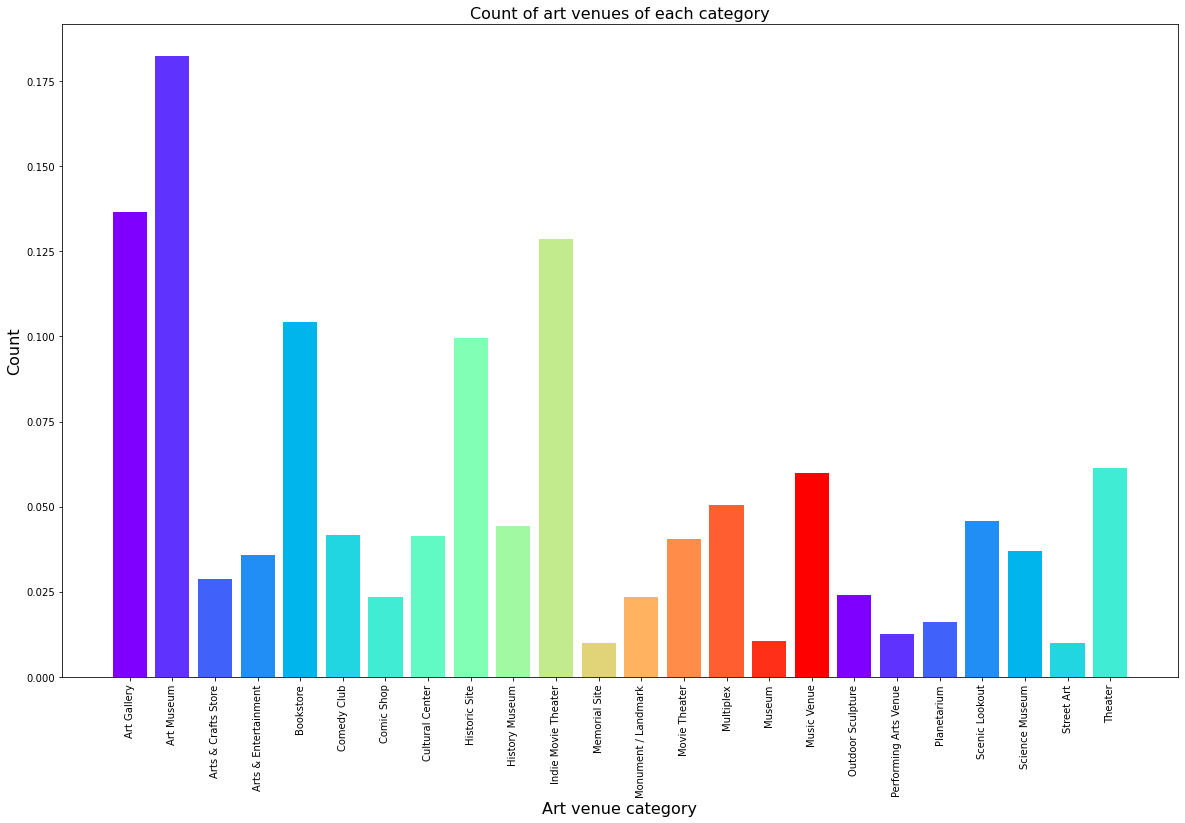

In [32]:
plot_colors = cm.rainbow(np.linspace(0, 1, len(paris_grouped[art_cols].index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Art venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of art venues of each category", fontsize = 16)
plt.bar(paris_grouped[art_cols].columns, paris_grouped[art_cols].sum(), color = plot_colors)

In [33]:
art_cols.append('Arrondissement')

In [34]:
art_cols.insert(0, art_cols.pop(art_cols.index('Arrondissement')))
paris_grouped = paris_grouped.loc[:, art_cols]
paris_grouped.head()

,Arrondissement,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site,History Museum,Indie Movie Theater,Memorial Site,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Scenic Lookout,Science Museum,Street Art,Theater
0,10th (Xe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.018519,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
1,11th (XIe) R,0.000000,0.012500,0.0,0.0,0.0125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0125,0.000000,0.0,0.0,0.0,0.0
2,12th (XIIe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.013889,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
3,13th (XIIIe) L,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.010526,0.0,0.0,0.010526,0.021053,0.010526,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
4,14th (XIVe) L,0.016129,0.016129,0.0,0.0,0.0000,0.0,0.0,0.0,0.016129,0.0,0.000000,0.0,0.0,0.016129,0.000000,0.000000,0.000000,0.0,0.0000,0.016129,0.0,0.0,0.0,0.0


In [35]:
art_paris = paris_grouped

In [36]:
art_paris.head()

,Arrondissement,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site,History Museum,Indie Movie Theater,Memorial Site,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Scenic Lookout,Science Museum,Street Art,Theater
0,10th (Xe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.018519,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
1,11th (XIe) R,0.000000,0.012500,0.0,0.0,0.0125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0125,0.000000,0.0,0.0,0.0,0.0
2,12th (XIIe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.013889,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
3,13th (XIIIe) L,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.010526,0.0,0.0,0.010526,0.021053,0.010526,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0
4,14th (XIVe) L,0.016129,0.016129,0.0,0.0,0.0000,0.0,0.0,0.0,0.016129,0.0,0.000000,0.0,0.0,0.016129,0.000000,0.000000,0.000000,0.0,0.0000,0.016129,0.0,0.0,0.0,0.0


In [37]:
def return_most_common_art_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_art_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Arrondissement']
for ind in np.arange(num_top_art_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

arrondissement_art_venues_sorted = pd.DataFrame(columns=columns)
arrondissement_art_venues_sorted['Arrondissement'] = art_paris['Arrondissement']

for ind in np.arange(art_paris.shape[0]):
    arrondissement_art_venues_sorted.iloc[ind, 1:] = return_most_common_art_venues(art_paris.iloc[ind, :], num_top_art_venues)

arrondissement_art_venues_sorted

,Arrondissement,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th (Xe) R,Music Venue,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
1,11th (XIe) R,Art Museum,Performing Arts Venue,Bookstore,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
2,12th (XIIe) R,Movie Theater,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
3,13th (XIIIe) L,Multiplex,Museum,Movie Theater,Indie Movie Theater,Theater,History Museum,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore
4,14th (XIVe) L,Art Gallery,Art Museum,Planetarium,Movie Theater,Historic Site,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
5,15th (XVe) L,Indie Movie Theater,Arts & Crafts Store,Bookstore,Multiplex,Theater,Art Museum,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
6,16th (XVIe) R,Theater,Street Art,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site
7,17th (XVIIe) R,Bookstore,Art Gallery,Indie Movie Theater,Music Venue,Multiplex,Cultural Center,Art Museum,Arts & Crafts Store,Arts & Entertainment,Comedy Club
8,18th (XVIIIe) R,Art Museum,Theater,Music Venue,Comedy Club,History Museum,Indie Movie Theater,Street Art,Art Gallery,Outdoor Sculpture,Scenic Lookout
9,19th (XIXe) R,Art Museum,Scenic Lookout,Arts & Entertainment,Historic Site,Theater,Indie Movie Theater,Arts & Crafts Store,Bookstore,Comedy Club,Comic Shop


### Let us now apply K-means clustering on the dataframe.

In [39]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [40]:
art_paris_grouped_clustering = paris_grouped.drop('Arrondissement', 1)

In [41]:
max_range = 15 #number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for paris_clusters in range(2, max_range) :
    
    # Run k-means clustering
    kmeans = KMeans(n_clusters = paris_clusters, init = 'k-means++').fit_predict(art_paris_grouped_clustering)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(art_paris_grouped_clustering, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(paris_clusters)
    scores.append(score)

In [43]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /Users/francescacollu/opt/anaconda3/lib/python3.8/site-packages (1.2)


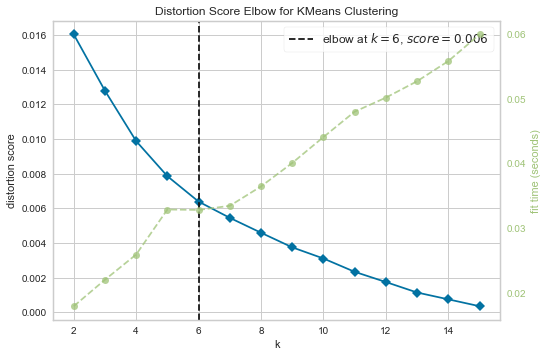

In [44]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=15)
model.fit(art_paris_grouped_clustering)
model.show()

In [45]:
# set number of clusters
kclusters = 6

art_paris_grouped_clustering = art_paris.drop('Arrondissement', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(art_paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 4, 0, 4, 1, 3], dtype=int32)

In [46]:
arrondissement_art_venues_sorted.head()

,Arrondissement,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th (Xe) R,Music Venue,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
1,11th (XIe) R,Art Museum,Performing Arts Venue,Bookstore,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
2,12th (XIIe) R,Movie Theater,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
3,13th (XIIIe) L,Multiplex,Museum,Movie Theater,Indie Movie Theater,Theater,History Museum,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore
4,14th (XIVe) L,Art Gallery,Art Museum,Planetarium,Movie Theater,Historic Site,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club


In [47]:
arrondissement_art_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = df_paris

paris_merged = paris_merged.join(arrondissement_art_venues_sorted.set_index('Arrondissement'), on='Arrondissement')

paris_merged.head()

,Arrondissement,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",48.857101,2.353064,2,Art Gallery,Historic Site,Art Museum,Bookstore,Arts & Crafts Store,Cultural Center,Memorial Site,Music Venue,Performing Arts Venue,Science Museum
1,5th (Ve) L,Panthéon,48.846210,2.346110,5,Indie Movie Theater,Theater,Science Museum,Comic Shop,Monument / Landmark,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
2,6th (VIe) L,Luxembourg,48.847580,2.340940,5,Indie Movie Theater,Science Museum,Theater,Bookstore,Comedy Club,Comic Shop,Monument / Landmark,History Museum,Art Museum,Arts & Crafts Store
3,7th (VIIe) L,Palais-Bourbon,48.860830,2.318590,1,Art Museum,Music Venue,Cultural Center,History Museum,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
4,8th (VIIIe) R,Élysée,48.869317,2.316878,2,Art Gallery,Historic Site,Theater,Art Museum,Outdoor Sculpture,Scenic Lookout,History Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore


In [48]:
paris_merged['Cluster Labels']=paris_merged['Cluster Labels'].fillna(0).astype('int')

In [49]:
paris_merged.head()

,Arrondissement,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,"Louvre, Bourse, Temple, Hôtel-de-Ville",48.857101,2.353064,2,Art Gallery,Historic Site,Art Museum,Bookstore,Arts & Crafts Store,Cultural Center,Memorial Site,Music Venue,Performing Arts Venue,Science Museum
1,5th (Ve) L,Panthéon,48.846210,2.346110,5,Indie Movie Theater,Theater,Science Museum,Comic Shop,Monument / Landmark,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
2,6th (VIe) L,Luxembourg,48.847580,2.340940,5,Indie Movie Theater,Science Museum,Theater,Bookstore,Comedy Club,Comic Shop,Monument / Landmark,History Museum,Art Museum,Arts & Crafts Store
3,7th (VIIe) L,Palais-Bourbon,48.860830,2.318590,1,Art Museum,Music Venue,Cultural Center,History Museum,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
4,8th (VIIIe) R,Élysée,48.869317,2.316878,2,Art Gallery,Historic Site,Theater,Art Museum,Outdoor Sculpture,Scenic Lookout,History Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore


In [50]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [matplotlib.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Arrondissement'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
val = 1
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,10th (Xe) R,0,Music Venue,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
7,11th (XIe) R,0,Art Museum,Performing Arts Venue,Bookstore,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
8,12th (XIIe) R,0,Movie Theater,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
9,13th (XIIIe) L,0,Multiplex,Museum,Movie Theater,Indie Movie Theater,Theater,History Museum,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore
10,14th (XIVe) L,0,Art Gallery,Art Museum,Planetarium,Movie Theater,Historic Site,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
12,16th (XVIe) R,0,Theater,Street Art,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site


In [52]:
val = 2
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,7th (VIIe) L,1,Art Museum,Music Venue,Cultural Center,History Museum,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
14,18th (XVIIIe) R,1,Art Museum,Theater,Music Venue,Comedy Club,History Museum,Indie Movie Theater,Street Art,Art Gallery,Outdoor Sculpture,Scenic Lookout
16,20th (XXe) R,1,Art Museum,Theater,Street Art,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site


In [53]:
val = 3
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris Centre 1st (Ier) / 2nd (IIe) / 3rd (IIIe...,2,Art Gallery,Historic Site,Art Museum,Bookstore,Arts & Crafts Store,Cultural Center,Memorial Site,Music Venue,Performing Arts Venue,Science Museum
4,8th (VIIIe) R,2,Art Gallery,Historic Site,Theater,Art Museum,Outdoor Sculpture,Scenic Lookout,History Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore


In [54]:
val = 4
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,19th (XIXe) R,3,Art Museum,Scenic Lookout,Arts & Entertainment,Historic Site,Theater,Indie Movie Theater,Arts & Crafts Store,Bookstore,Comedy Club,Comic Shop


In [55]:
val = 5
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,9th (IXe) R,4,Art Gallery,Bookstore,Comedy Club,Indie Movie Theater,Street Art,Art Museum,Arts & Crafts Store,Arts & Entertainment,Comic Shop,Cultural Center
11,15th (XVe) L,4,Indie Movie Theater,Arts & Crafts Store,Bookstore,Multiplex,Theater,Art Museum,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
13,17th (XVIIe) R,4,Bookstore,Art Gallery,Indie Movie Theater,Music Venue,Multiplex,Cultural Center,Art Museum,Arts & Crafts Store,Arts & Entertainment,Comedy Club


In [56]:
val = 6
paris_merged.loc[paris_merged['Cluster Labels'] == (val - 1), paris_merged.columns[[0] + np.arange(4, paris_merged.shape[1]).tolist()]]

,Arrondissement,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,5th (Ve) L,5,Indie Movie Theater,Theater,Science Museum,Comic Shop,Monument / Landmark,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club
2,6th (VIe) L,5,Indie Movie Theater,Science Museum,Theater,Bookstore,Comedy Club,Comic Shop,Monument / Landmark,History Museum,Art Museum,Arts & Crafts Store


In [57]:
paris_with_cluster_labels = art_paris.join(paris_merged.set_index('Arrondissement'), on='Arrondissement')

In [58]:
paris_with_cluster_labels.head()

,Arrondissement,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site,History Museum,Indie Movie Theater,Memorial Site,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Scenic Lookout,Science Museum,Street Art,Theater,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th (Xe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.018519,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,Entrepôt,48.842150,2.375990,0,Music Venue,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
1,11th (XIe) R,0.000000,0.012500,0.0,0.0,0.0125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0125,0.000000,0.0,0.0,0.0,0.0,Popincourt,48.859350,2.376010,0,Art Museum,Performing Arts Venue,Bookstore,Theater,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Comedy Club,Comic Shop,Cultural Center
2,12th (XIIe) R,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.013889,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,Reuilly,48.845002,2.389365,0,Movie Theater,Theater,Indie Movie Theater,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center
3,13th (XIIIe) L,0.000000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.010526,0.0,0.0,0.010526,0.021053,0.010526,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,Gobelins,48.834504,2.353472,0,Multiplex,Museum,Movie Theater,Indie Movie Theater,Theater,History Museum,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore
4,14th (XIVe) L,0.016129,0.016129,0.0,0.0,0.0000,0.0,0.0,0.0,0.016129,0.0,0.000000,0.0,0.0,0.016129,0.000000,0.000000,0.000000,0.0,0.0000,0.016129,0.0,0.0,0.0,0.0,Observatoire,48.835960,2.334260,0,Art Gallery,Art Museum,Planetarium,Movie Theater,Historic Site,Indie Movie Theater,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club


In [59]:
paris_with_cluster_labels = paris_with_cluster_labels.loc[:, 'Art Gallery':'Cluster Labels']

In [60]:
paris_with_cluster_labels = paris_with_cluster_labels.drop(['Name', 'Latitude', 'Longitude'], axis=1)

In [61]:
cols = list(paris_with_cluster_labels)
cols.insert(0, cols.pop(cols.index('Cluster Labels')))
cols
paris_with_cluster_labels = paris_with_cluster_labels.loc[:, cols]

In [62]:
paris_with_cluster_labels

,Cluster Labels,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site,History Museum,Indie Movie Theater,Memorial Site,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Scenic Lookout,Science Museum,Street Art,Theater
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
1,0,0.000000,0.012500,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0125,0.000000,0.000000,0.000000,0.00,0.000000
2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010526,0.00,0.000000,0.010526,0.021053,0.010526,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
4,0,0.016129,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.00,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.0000,0.016129,0.000000,0.000000,0.00,0.000000
5,4,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.00,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
6,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
7,4,0.010526,0.000000,0.000000,0.000000,0.021053,0.000000,0.000000,0.010526,0.000000,0.000000,0.010526,0.00,0.000000,0.000000,0.010526,0.000000,0.010526,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
8,1,0.010000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.0000,0.000000,0.010000,0.000000,0.01,0.010000
9,3,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.035714,0.000000,0.00,0.000000


In [63]:
paris_with_cluster_labels.loc[:, 'Cluster Labels'].replace([0, 1, 2, 3, 4, 5], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6'], inplace=True)

In [64]:
paris_with_cluster_labels = paris_with_cluster_labels.groupby('Cluster Labels').sum()

In [65]:
paris_with_cluster_labels

,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Bookstore,Comedy Club,Comic Shop,Cultural Center,Historic Site,History Museum,Indie Movie Theater,Memorial Site,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Sculpture,Performing Arts Venue,Planetarium,Scenic Lookout,Science Museum,Street Art,Theater
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,
Cluster 1,0.016129,0.028629,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.016129,0.000000,0.010526,0.00,0.000000,0.040544,0.021053,0.010526,0.018519,0.000000,0.0125,0.016129,0.000000,0.000000,0.00,0.000000
Cluster 2,0.010000,0.084312,0.000000,0.000000,0.000000,0.010000,0.000000,0.020833,0.000000,0.030833,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.030833,0.010000,0.0000,0.000000,0.010000,0.000000,0.01,0.010000
Cluster 3,0.081667,0.033889,0.010000,0.000000,0.020000,0.000000,0.000000,0.010000,0.047778,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.0000,0.000000,0.000000,0.000000,0.00,0.027778
Cluster 4,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.035714,0.000000,0.00,0.000000
Cluster 5,0.028708,0.000000,0.018868,0.000000,0.058102,0.018182,0.000000,0.010526,0.000000,0.000000,0.047576,0.00,0.000000,0.000000,0.029394,0.000000,0.010526,0.000000,0.0000,0.000000,0.000000,0.000000,0.00,0.000000
Cluster 6,0.000000,0.000000,0.000000,0.000000,0.013514,0.013514,0.023514,0.000000,0.000000,0.013514,0.060541,0.00,0.023514,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.037027,0.00,0.023514


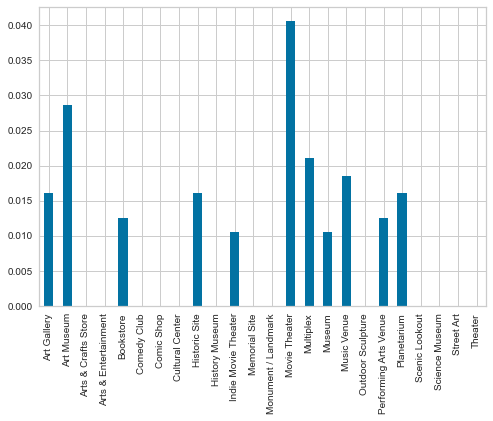

In [66]:
paris_with_cluster_labels.loc['Cluster 1', 'Art Gallery':'Theater'].plot(kind='bar')

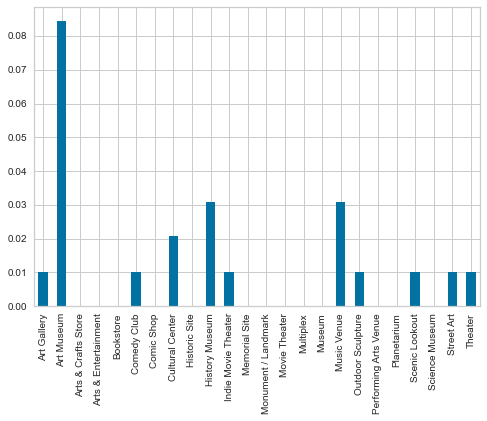

In [67]:
paris_with_cluster_labels.loc['Cluster 2', 'Art Gallery':'Theater'].plot(kind='bar')

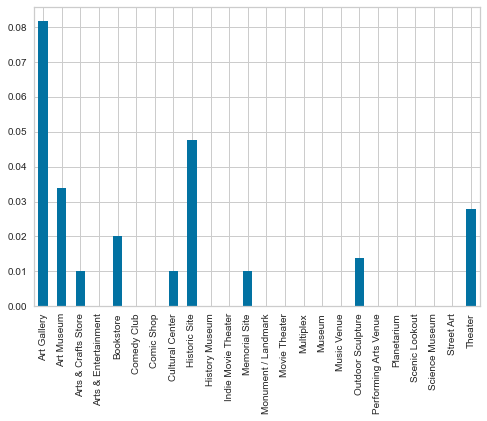

In [68]:
paris_with_cluster_labels.loc['Cluster 3', 'Art Gallery':'Theater'].plot(kind='bar')

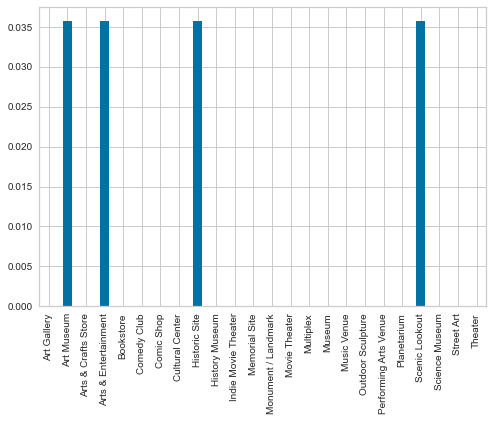

In [69]:
paris_with_cluster_labels.loc['Cluster 4', 'Art Gallery':'Theater'].plot(kind='bar')

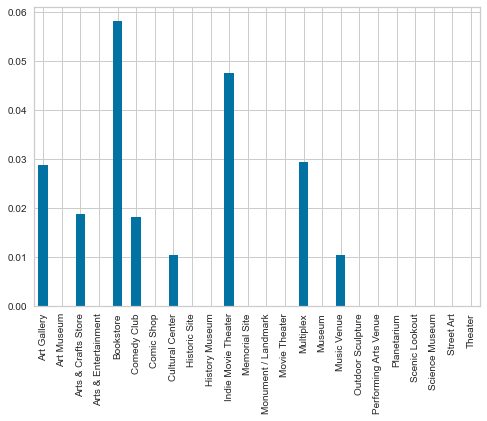

In [70]:
paris_with_cluster_labels.loc['Cluster 5', 'Art Gallery':'Theater'].plot(kind='bar')

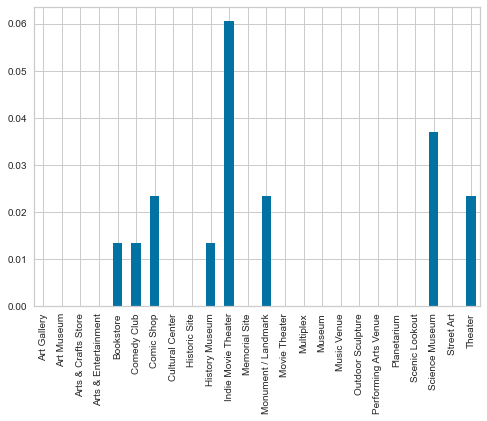

In [71]:
paris_with_cluster_labels.loc['Cluster 6', 'Art Gallery':'Theater'].plot(kind='bar')

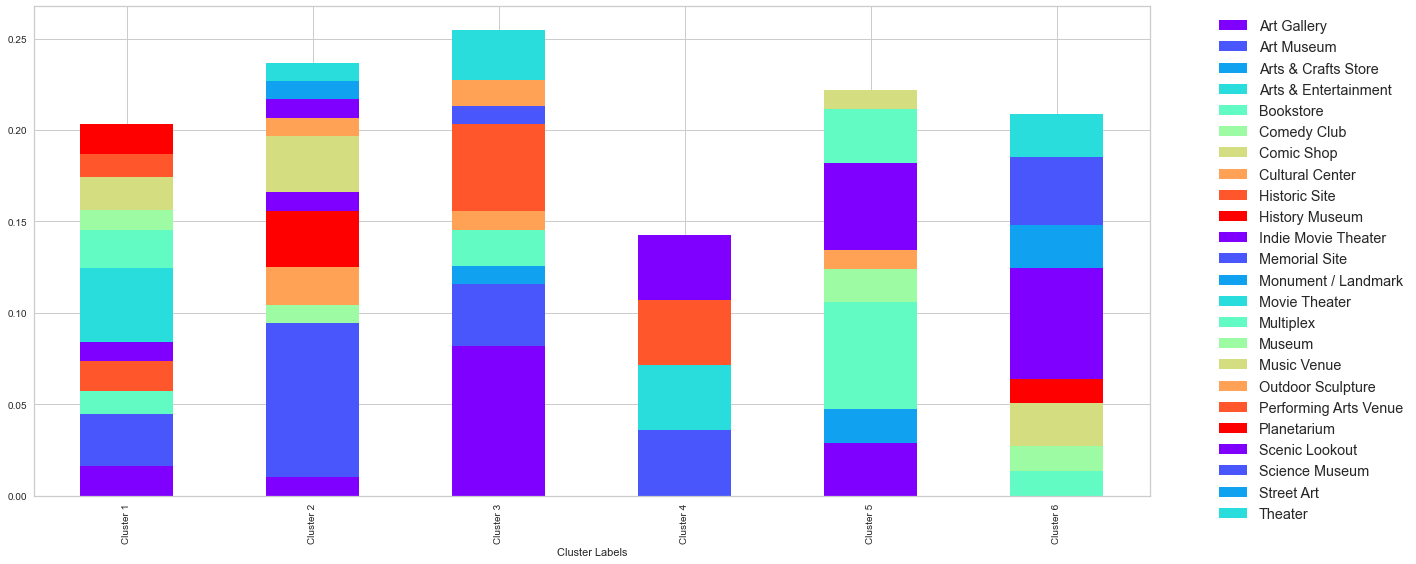

In [72]:
my_colors = cm.rainbow(np.linspace(0, 1, 10, endpoint=True))#len(paris_with_cluster_labels.index)))
paris_with_cluster_labels.plot(kind='bar', stacked=True, figsize=(20,9), color = my_colors)

plt.legend(loc='best', ncol= 1, bbox_to_anchor=(1.05, 1), fontsize='large')

In [114]:
data_final_labels = {'Cluster':['1', 
                                '2', 
                                '3', 
                                '4', 
                                '5', 
                                '6'], 
                     'Arrondissement':['10th/11th/12th/13th/14th/16th', 
                                                                                 '7th/18th/20th',
                                                                                 '1st/2nd/3th/4th/8th', 
                                                                                 '19th', 
                                                                                 '9th/15th/17th', 
                                                                                 '5th/6th'], 
                     'Label':['The dynamic tourist', 
                              'The outdoor tourist', 
                              'The history passionate tourist', 
                              'The photographer tourist', 
                              'The refined tourist', 
                              'The young tourist']}
df_final_labels = pd.DataFrame(data_final_labels, index=None)

In [115]:
df_final_labels

,Cluster,Arrondissement,Label
0,1,10th/11th/12th/13th/14th/16th,The dynamic tourist
1,2,7th/18th/20th,The outdoor tourist
2,3,1st/2nd/3th/4th/8th,The history passionate tourist
3,4,19th,The photographer tourist
4,5,9th/15th/17th,The refined tourist
5,6,5th/6th,The young tourist
